# Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale = 2)
# 그래프의 기본 스타일과 font크기를 설정하는 코드입니다.

In [2]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Preparation

In [5]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [6]:
X_train.shape, X_test.shape

((891, 16), (418, 16))

In [7]:
X_tr, X_vld, y_tr, y_vld =\
    train_test_split(X_train, target_label, test_size = 0.2, random_state = 2020)

## Model generation and prediction

In [8]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
pred = model.predict(X_vld)

In [9]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0],
                                           100 * metrics.accuracy_score(pred, y_vld)))

총 179명 중 79.89% 정확도로 생존을 맞춤


In [10]:
imp = model.feature_importances_
feature_imp = pd.Series(imp, index = df_test.columns)

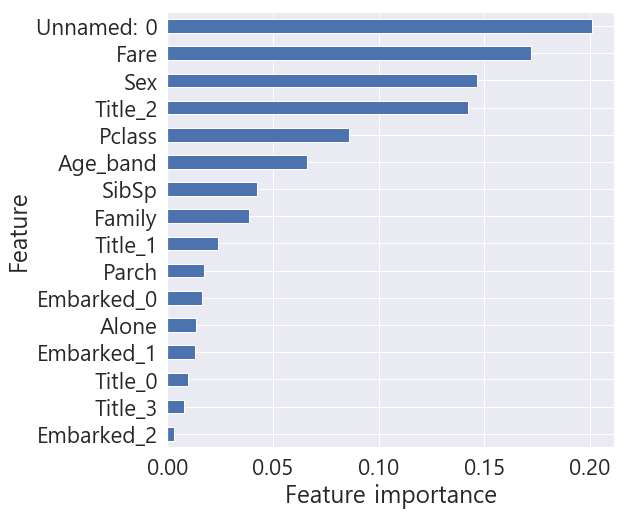

In [11]:
plt.figure(figsize = (8, 8))
feature_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
submission = pd.read_csv('../input/gender_submission.csv')

In [ ]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [ ]:
submission.to_csv('./result.csv', index = False)